# Homework 4

In [209]:
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

## Problem 4

In [193]:
iris = datasets.load_iris()
X_ = iris.data 
y = iris.target
Fones = np.ones(X_.shape[0], dtype=float)
X = np.column_stack((Fones, X_))

def onehot(y):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    integer_encoded = y.reshape(len(y), 1)
    one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
    return one_hot_encoded


X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

encoded_y_train = onehot(y_train)
encoded_y_test = onehot(y_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", encoded_y_train.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", encoded_y_test.shape)

X_train_scaled shape: (120, 5)
y_train shape: (120, 3)
X_test_scaled shape: (30, 5)
y_test shape: (30, 3)


In [ ]:
def activation(Z):
    act = np.ones(Z.shape, dtype=float)
    for i, z in enumerate(Z):
        act[i] = 1 / (1. + np.exp(-np.clip(z, -250, 250)))
    
    return act

In [216]:
def initialize_weights(num_features):
    return np.random.rand(num_features, 3)

def binary_cross_entropy_cost(predictions, targets):
    eps = 1e-15
    predictions = np.clip(predictions, eps, 1 - eps)
    return (-(1 - targets) * np.log(1 - predictions) - (targets) * np.log(predictions)) / len(predictions)

def binary_cross_entropy_grad(predictions, targets, X): 
    return 1 / len(predictions) * X.T @ (predictions - targets) 

def linear(X, w):
    return X @ w

w = initialize_weights(X_train_scaled.shape[1])
MAX_ITERATIONS = 500
i = 0
alpha = 0.1
errors = []

while (i < MAX_ITERATIONS):
    total_cost = 0
    for _example, _target in zip(X_train_scaled, encoded_y_train):
        example = _example[np.newaxis, :]
        target = _target[np.newaxis, :]
        preds = activation(linear(example, w))
        cost = binary_cross_entropy_cost(preds, target)
        total_cost += cost[0]
        grad = binary_cross_entropy_grad(preds, target, example)
        w -= grad * alpha
    total_cost /= len(X_train_scaled)
    errors.append(total_cost)
    i += 1

errors = np.array(errors)
print(f"Weights:\n {w}")

Weights:
 [[ 0.11751731  0.66320312  0.42809341]
 [-0.53722544 -0.13662996 -0.44074124]
 [ 6.770084   -1.08741446  0.9892237 ]
 [-8.4444322   1.44202318 -0.35318987]
 [-7.26496016 -1.90436463  3.61396504]]


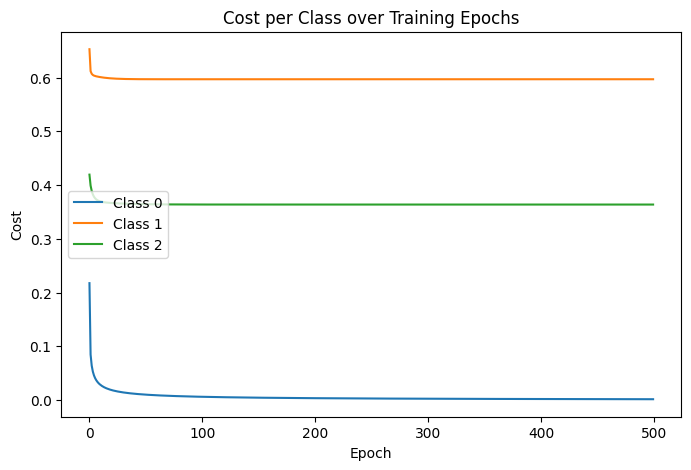

In [217]:
num_epochs = len(errors)
epochs = np.arange(num_epochs)

plt.figure(figsize=(8, 5))

# Plot each class separately
plt.plot(epochs, errors[:, 0], label='Class 0')
plt.plot(epochs, errors[:, 1], label='Class 1')
plt.plot(epochs, errors[:, 2], label='Class 2')

plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost per Class over Training Epochs')
plt.legend()
plt.show()

In [220]:
# Train results
def num_misslassifications(preds, targets):
    pred_classes = np.argmax(preds, axis=1)
    true_classes = np.argmax(targets, axis=1)
    return np.sum(pred_classes != true_classes)

preds = activation(linear(X_train_scaled, w))
misclassifies = num_misslassifications(preds, encoded_y_train)
print(f"Train missclassifications: {misclassifies}")
print(f"Accuracy: {(len(preds) - misclassifies) / len(preds) * 100} %")

cm = confusion_matrix(np.argmax(encoded_y_train, axis=1),np.argmax(preds, axis=1), labels=[0, 1, 2])
print('Train number in each class down vs number in each known class across ')
print('confusion matrix \n 0 1 2\n', cm.T)


preds = activation(linear(X_test_scaled, w))
misclassifies = num_misslassifications(preds, encoded_y_test)
print(f"Test missclassifications: {misclassifies}")
print(f"Accuracy: {(len(preds) - misclassifies) / len(preds) * 100} %")

cm = confusion_matrix(np.argmax(encoded_y_test, axis=1),np.argmax(preds, axis=1), labels=[0, 1, 2])
print('Test number in each class down vs number in each known class across ')
print('confusion matrix \n 0 1 2\n', cm.T)



Train missclassifications: 17
Accuracy: 85.83333333333333 %
Train number in each class down vs number in each known class across 
confusion matrix 
 0 1 2
 [[40  0  0]
 [ 0 27  3]
 [ 0 14 36]]
Test missclassifications: 4
Accuracy: 86.66666666666667 %
Test number in each class down vs number in each known class across 
confusion matrix 
 0 1 2
 [[10  0  0]
 [ 0  6  1]
 [ 0  3 10]]


In [222]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred)
print(f'Train Accuracy: {accuracy:.2f}')

y_pred = lr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

print(lr.coef_)

Train Accuracy: 0.97
Test Accuracy: 1.00
[[ 0.         -1.00316587  1.14487318 -1.8113482  -1.69251025]
 [ 0.          0.52799044 -0.28319987 -0.34060665 -0.72013959]
 [ 0.          0.47517543 -0.86167331  2.15195485  2.41264984]]
